The Challenge
Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.
Label    Description
0        T-shirt/top
1        Trouser
2        Pullover
3        Dress
4        Coat
5        Sandal
6        Shirt
7        Sneaker
8        Bag
9        Ankle boot

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [3]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

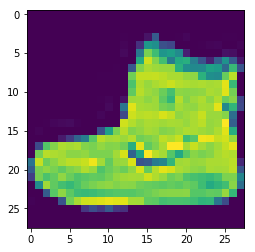

In [5]:
plt.imshow(x_train[0])

In [7]:
###Checking the max values for x_train, x_test
print(x_train.max())
print(x_test.max())

255
255


In [8]:
##Normalize the dataset to the bracket of (0,1)
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [9]:
x_train.max()

1.0

In [10]:
x_train.min()

0.0

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
##Reshapping the x arrays as per the image
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [14]:
###Converting to one-hot encoding
from keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [21]:
##Building my deeplearning model:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [23]:
model = Sequential()

###1st layer of Network:
model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##2nd Layer of Network:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## Flatten out the data before passing thorugh dense layer
model.add(Flatten())

##Dense layer of 128 neurons are pushed for Hidden Layer
model.add(Dense(128,activation="relu"))

## Output layer for 10 classes 
model.add(Dense(10,activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model.fit(x_train,y_cat_train,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.4474 - acc: 0.8396
Epoch 2/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2895 - acc: 0.8942
Epoch 3/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2545 - acc: 0.9076
Epoch 4/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2351 - acc: 0.9156
Epoch 5/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2199 - acc: 0.9207


In [28]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 4s 366us/step


[0.27750269664525984, 0.8992]

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
predictions = model.predict_classes(x_test)

In [33]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.81      0.84      1000
           3       0.94      0.87      0.91      1000
           4       0.78      0.90      0.84      1000
           5       0.95      0.99      0.97      1000
           6       0.69      0.77      0.73      1000
           7       0.97      0.94      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[793   1  13   9   9   1 169   0   5   0]
 [  0 978   0  11   3   0   6   0   2   0]
 [ 15   0 807   6 113   0  58   0   1   0]
 [ 12   6   8 874  47   0  51   0   2   0]
 [  0   1  25  12 903   0  58   0   1   0]
 [  0   0   0   0   0 993 